                                            NLP ASSIGNMENT - 2

PART - 1

In [ ]:
# Install gensim if not installed
!pip install gensim

import gensim.downloader as api

# Load Google's pre-trained Word2Vec model (300-dimensional vectors)
print("Loading Word2Vec model (this may take a while the first time)...")
model = api.load('word2vec-google-news-300')
print("Model loaded successfully!")

# 1️⃣ Pick 5 words & get most similar words
words = ["computer", "music", "football", "money", "university"]

for w in words:
    print(f"\nTop similar words to '{w}':")
    for sim_word, score in model.most_similar(w, topn=5):
        print(f"  {sim_word} ({score:.4f})")

# 2️⃣ Word analogy tests
print("\n--- Analogy Tests ---")
examples = [
    ("king", "man", "woman"),  # classic example
    ("paris", "france", "italy"),  # capital-country analogy
    ("walking", "walked", "swam"),  # tense analogy
]

for a, b, c in examples:
    result = model.most_similar(positive=[a, c], negative=[b], topn=1)
    predicted, score = result[0]
    print(f"'{a}' - '{b}' + '{c}' ≈ '{predicted}' ({score:.4f})")



Loading Word2Vec model (this may take a while the first time)...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!

Top similar words to 'computer':
  computers (0.7979)
  laptop (0.6640)
  laptop_computer (0.6549)
  Computer (0.6473)
  com_puter (0.6082)

Top similar words to 'music':
  classical_music (0.7198)
  jazz (0.6835)
  Music (0.6596)
  Without_Donny_Kirshner (0.6416)
  songs (0.6396)

Top similar words to 'football':
  soccer (0.7314)
  fooball (0.7140)
  Football (0.7125)
  basketball (0.6682)
  footbal (0.6649)

Top similar words to 'money':
  monies (0.7165)
  funds (0.7055)
  moneys (0.6289)
  dollars (0.6289)
  cash (0.6151)

Top similar words to 'university':
  universities (0.7004)
  faculty (0.6781)
  unversity (0.6758)
  undergraduate (0.6587)
  univeristy (0.6585)

--- Analogy Tests ---
'king' - 'man' + 'woman' ≈ 'queen' (0.7118)
'paris' - 'france' + 'italy' ≈ 'lohan' (0.5070)
'walking' - 'walked' + 's

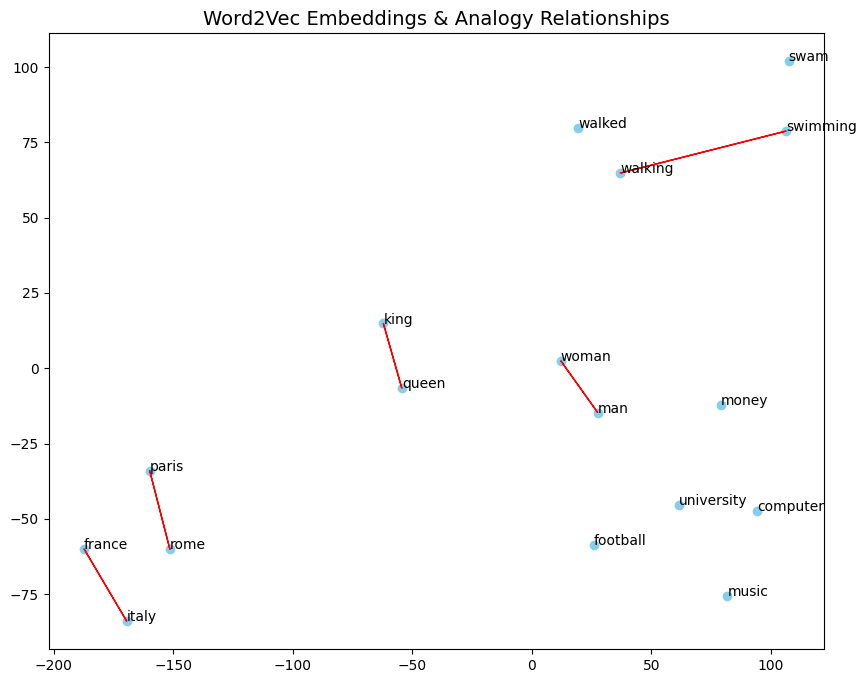

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Words to visualize
words_to_plot = [
    "king", "queen", "man", "woman",
    "paris", "rome", "france", "italy",
    "walking", "walked", "swam", "swimming",
    "computer", "music", "football", "money", "university"
]

# Word analogy pairs to draw arrows (start → end)
analogy_pairs = [
    ("king", "queen"),
    ("man", "woman"),
    ("paris", "rome"),
    ("france", "italy"),
    ("walking", "swimming")
]

# Get vectors & convert to NumPy array
word_vectors = np.array([model[w] for w in words_to_plot])

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, init='pca', learning_rate='auto')
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot words
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='skyblue')

# Annotate each word
for i, word in enumerate(words_to_plot):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)

# Draw arrows for analogy pairs
for start, end in analogy_pairs:
    start_idx = words_to_plot.index(start)
    end_idx = words_to_plot.index(end)
    plt.arrow(
        word_vectors_2d[start_idx, 0],
        word_vectors_2d[start_idx, 1],
        word_vectors_2d[end_idx, 0] - word_vectors_2d[start_idx, 0],
        word_vectors_2d[end_idx, 1] - word_vectors_2d[start_idx, 1],
        color='red', width=0.002, head_width=0.05, length_includes_head=True
    )

plt.title("Word2Vec Embeddings & Analogy Relationships", fontsize=14)
plt.show()


PART - 2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


imports done
(50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


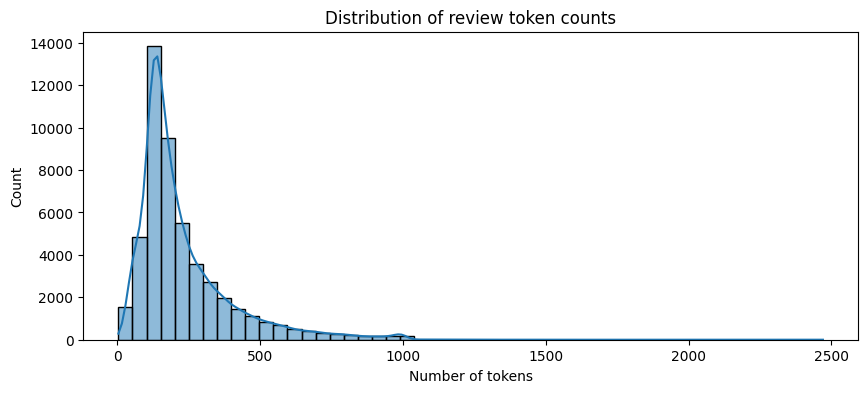


Example positive review:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ

Example negative review:
 This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly enter

In [3]:
# Part 1: Setup & quick EDA
# pip installs (uncomment if needed)
!pip install gensim==4.3.1

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

print("imports done")

# Load dataset (adjust path if needed)
DATA_PATH = "/content/IMDB Dataset.csv"
df = pd.read_csv(DATA_PATH)

# Quick look
print(df.shape)
print(df.sentiment.value_counts())
display(df.head())

# Basic length distribution
df['text_len'] = df['review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,4))
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title("Distribution of review token counts")
plt.xlabel("Number of tokens")
plt.show()

# Show some examples
print("\nExample positive review:\n", df[df.sentiment == 'positive'].review.iloc[0][:500])
print("\nExample negative review:\n", df[df.sentiment == 'negative'].review.iloc[1][:500])


In [7]:
# Part 2: Cleaning text - remove punctuations, stopwords, lemmatize
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Lowercase, remove HTML, non-letters, extra spaces"""
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)         # remove HTML tags
    text = re.sub(r"[^a-z\s]", " ", text)      # keep only letters
    text = re.sub(r"\s+", " ", text).strip()   # normalize spaces
    return text

def preprocess_tokens(text, remove_stopwords=True, do_lemmatize=True):
    """Return list of cleaned tokens"""
    tokens = nltk.word_tokenize(text)
    if remove_stopwords:
        tokens = [t for t in tokens if t not in stop_words]
    if do_lemmatize:
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Apply cleaning + tokenization
df["clean_review"] = df["review"].apply(clean_text)
df["tokens"] = df["clean_review"].apply(preprocess_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



=== SENTIMENT: positive ===
Top words: [('film', 49712), ('movie', 44850), ('one', 28288), ('like', 18198), ('time', 16318), ('good', 15094), ('story', 14185), ('character', 14028), ('great', 13012), ('see', 12931), ('well', 12832), ('make', 11244), ('get', 11194), ('also', 10793), ('really', 10740)]
Top bigrams: [('one best', 1686), ('even though', 1099), ('year old', 1081), ('ever seen', 977), ('first time', 966), ('new york', 855), ('main character', 842), ('special effect', 833), ('see movie', 821), ('good movie', 797), ('must see', 783), ('great movie', 775)]
Top trigrams: [('movie ever seen', 245), ('new york city', 195), ('film ever made', 167), ('world war ii', 167), ('one best movie', 159), ('one best film', 152), ('based true story', 137), ('film ever seen', 133)]

=== SENTIMENT: negative ===
Top words: [('movie', 58431), ('film', 43751), ('one', 27162), ('like', 22934), ('even', 15255), ('time', 15152), ('good', 14774), ('bad', 14726), ('character', 14333), ('would', 14007)

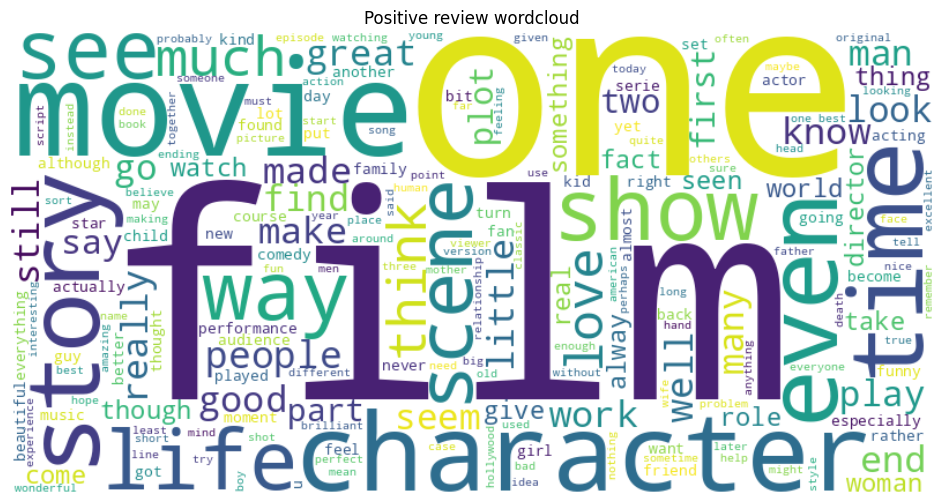

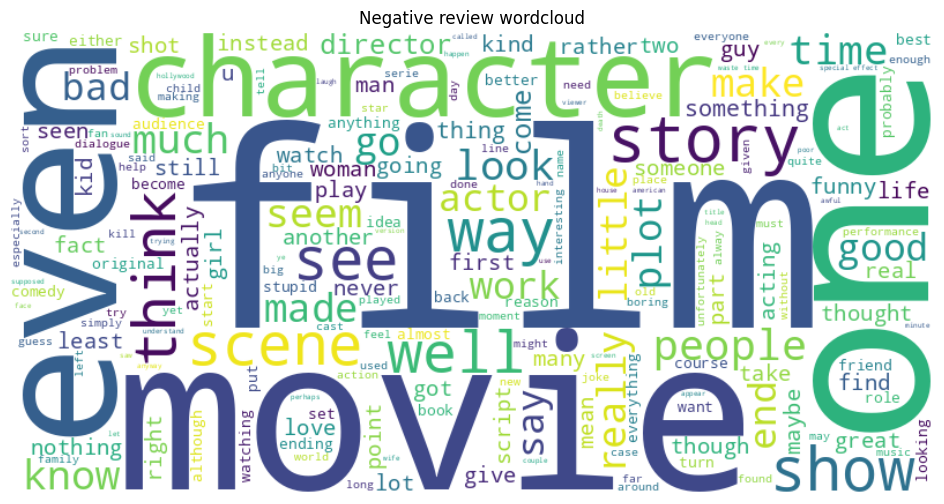

In [8]:
# Part 3: EDA - top words/ngrams and wordclouds (per sentiment)
from nltk.util import ngrams
from itertools import chain
from collections import Counter

def top_ngrams(tokens_series, ngram=1, top_k=20):
    all_grams = []
    for tokens in tokens_series:
        if ngram == 1:
            all_grams.extend(tokens)
        else:
            all_grams.extend([' '.join(g) for g in ngrams(tokens, ngram)])
    return Counter(all_grams).most_common(top_k)

for lbl in df['sentiment'].unique():
    tokens_series = df[df['sentiment'] == lbl]['tokens']
    print(f"\n=== SENTIMENT: {lbl} ===")
    print("Top words:", top_ngrams(tokens_series, ngram=1, top_k=15)[:15])
    print("Top bigrams:", top_ngrams(tokens_series, ngram=2, top_k=12)[:12])
    print("Top trigrams:", top_ngrams(tokens_series, ngram=3, top_k=8)[:8])

# Wordclouds
def plot_wordcloud_from_tokens(tokens_series, title):
    text = " ".join(chain.from_iterable(tokens_series))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud_from_tokens(df[df['sentiment'] == 'positive']['tokens'], "Positive review wordcloud")
plot_wordcloud_from_tokens(df[df['sentiment'] == 'negative']['tokens'], "Negative review wordcloud")


In [10]:
# Part 4: Train/test split and doc-vector helper (we'll reuse this split)
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
X = df['tokens']   # list of tokens
y = df['sentiment']   # <-- FIXED (was df['label'])

# split (we'll use the token lists as X and keep raw texts too if needed)
X_train_tokens, X_test_tokens, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Also keep raw strings if needed
X_train_text = df.loc[X_train_tokens.index, 'clean_review']
X_test_text = df.loc[X_test_tokens.index, 'clean_review']

print("Train size:", len(X_train_tokens), "Test size:", len(X_test_tokens))


def document_vector_avg(token_list, model, vector_size):
    """
    Compute average vector for a list of tokens using model.
    model must support .key_to_index (gensim 4.x) or membership check.
    """
    vecs = []
    for tok in token_list:
        try:
            vec = model.get_vector(tok)
            vecs.append(vec)
        except Exception:
            # OOV or other — skip
            continue
    if len(vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(vecs, axis=0)

Train size: 40000 Test size: 10000


In [11]:
# Part 5A: Pretrained Word2Vec (Google News) -> doc vectors (average)
import gensim.downloader as api
from tqdm.auto import tqdm

# Option 1: use google-news (large)
PRETRAINED_NAME = 'word2vec-google-news-300'  # ~1.6GB
# Option 2 (smaller alternative example): 'glove-wiki-gigaword-100'
# PRETRAINED_NAME = 'glove-wiki-gigaword-100'

print(f"Loading pretrained model: {PRETRAINED_NAME} (this may take a while)...")
pretrained = api.load(PRETRAINED_NAME)
print("Pretrained model loaded")

pretrained_vector_size = pretrained.vector_size
# Build average document vectors for train and test
X_train_pretrained = np.vstack([
    document_vector_avg(tokens, pretrained, pretrained_vector_size) for tokens in tqdm(X_train_tokens, desc="train doc vecs")
])
X_test_pretrained = np.vstack([
    document_vector_avg(tokens, pretrained, pretrained_vector_size) for tokens in tqdm(X_test_tokens, desc="test doc vecs")
])

print("Shapes:", X_train_pretrained.shape, X_test_pretrained.shape)


Loading pretrained model: word2vec-google-news-300 (this may take a while)...
Pretrained model loaded


train doc vecs:   0%|          | 0/40000 [00:00<?, ?it/s]

test doc vecs:   0%|          | 0/10000 [00:00<?, ?it/s]

Shapes: (40000, 300) (10000, 300)


In [12]:
# Part 6: classifier training & evaluation helper
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import pandas as pd

def train_eval_lr(X_tr, X_te, y_tr, y_te, C=1.0):
    clf = LogisticRegression(max_iter=2000, C=C, solver='lbfgs')
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_te, y_pred, average='binary', pos_label='positive')
    # also macro averages
    prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(y_te, y_pred, average='macro')
    return {
        'accuracy': acc,
        'precision_pos': prec,
        'recall_pos': rec,
        'f1_pos': f1,
        'precision_macro': prec_m,
        'recall_macro': rec_m,
        'f1_macro': f1_m,
        'clf': clf,
        'y_pred': y_pred
    }

# Evaluate pretrained vectors
results_pretrained = train_eval_lr(X_train_pretrained, X_test_pretrained, y_train, y_test)
print("Pretrained W2V results:", results_pretrained['accuracy'], results_pretrained['f1_pos'])
print(classification_report(y_test, results_pretrained['y_pred']))


Pretrained W2V results: 0.8562 0.8558829424734415
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      5000
    positive       0.86      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [13]:
# Part 7: Train custom embeddings using gensim
from gensim.models import Word2Vec, FastText

sentences = list(X_train_tokens)  # list of token lists
print("Number of sentences for training embeddings:", len(sentences))

EMBED_SIZE = 100   # smaller for speed
WINDOW = 5
MIN_COUNT = 5
WORKERS = 4
EPOCHS = 10

# 7A: Skip-gram (sg=1)
w2v_sg = Word2Vec(
    sentences=sentences,
    vector_size=EMBED_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    sg=1,
    workers=WORKERS,
    epochs=EPOCHS
)
print("Skip-gram trained")

# 7B: CBOW (sg=0)
w2v_cbow = Word2Vec(
    sentences=sentences,
    vector_size=EMBED_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    sg=0,
    workers=WORKERS,
    epochs=EPOCHS
)
print("CBOW trained")

# 7C: FastText
ft = FastText(
    sentences=sentences,
    vector_size=EMBED_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    workers=WORKERS,
    epochs=EPOCHS
)
print("FastText trained")


# Build document vectors by averaging (custom models)
def build_doc_matrix_from_model(model, token_lists, vector_size):
    mat = np.vstack([document_vector_avg(tokens, model.wv, vector_size) for tokens in tqdm(token_lists, desc="doc vecs")])
    return mat

X_train_sg = build_doc_matrix_from_model(w2v_sg, X_train_tokens, EMBED_SIZE)
X_test_sg  = build_doc_matrix_from_model(w2v_sg, X_test_tokens, EMBED_SIZE)

X_train_cbow = build_doc_matrix_from_model(w2v_cbow, X_train_tokens, EMBED_SIZE)
X_test_cbow  = build_doc_matrix_from_model(w2v_cbow, X_test_tokens, EMBED_SIZE)

X_train_ft = build_doc_matrix_from_model(ft, X_train_tokens, EMBED_SIZE)
X_test_ft  = build_doc_matrix_from_model(ft, X_test_tokens, EMBED_SIZE)


Number of sentences for training embeddings: 40000
Skip-gram trained
CBOW trained
FastText trained


doc vecs:   0%|          | 0/40000 [00:00<?, ?it/s]

doc vecs:   0%|          | 0/10000 [00:00<?, ?it/s]

doc vecs:   0%|          | 0/40000 [00:00<?, ?it/s]

doc vecs:   0%|          | 0/10000 [00:00<?, ?it/s]

doc vecs:   0%|          | 0/40000 [00:00<?, ?it/s]

doc vecs:   0%|          | 0/10000 [00:00<?, ?it/s]

In [14]:
# Part 8: Evaluate skip-gram, cbow, fasttext
results_sg = train_eval_lr(X_train_sg, X_test_sg, y_train, y_test)
results_cbow = train_eval_lr(X_train_cbow, X_test_cbow, y_train, y_test)
results_ft = train_eval_lr(X_train_ft, X_test_ft, y_train, y_test)

print("Skip-gram F1 (positive):", results_sg['f1_pos'])
print("CBOW F1 (positive):", results_cbow['f1_pos'])
print("FastText F1 (positive):", results_ft['f1_pos'])

print("\nSample classification report for FastText:")
print(classification_report(y_test, results_ft['y_pred']))


Skip-gram F1 (positive): 0.8778298593796748
CBOW F1 (positive): 0.8714971977582066
FastText F1 (positive): 0.85431654676259

Sample classification report for FastText:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      5000
    positive       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [15]:
# Part 9: Tabulate results
rows = []
rows.append({
    'method': f'pretrained:{PRETRAINED_NAME}',
    'accuracy': results_pretrained['accuracy'],
    'precision_pos': results_pretrained['precision_pos'],
    'recall_pos': results_pretrained['recall_pos'],
    'f1_pos': results_pretrained['f1_pos'],
    'f1_macro': results_pretrained['f1_macro']
})
rows.append({
    'method': 'custom_skipgram',
    'accuracy': results_sg['accuracy'],
    'precision_pos': results_sg['precision_pos'],
    'recall_pos': results_sg['recall_pos'],
    'f1_pos': results_sg['f1_pos'],
    'f1_macro': results_sg['f1_macro']
})
rows.append({
    'method': 'custom_cbow',
    'accuracy': results_cbow['accuracy'],
    'precision_pos': results_cbow['precision_pos'],
    'recall_pos': results_cbow['recall_pos'],
    'f1_pos': results_cbow['f1_pos'],
    'f1_macro': results_cbow['f1_macro']
})
rows.append({
    'method': 'custom_fasttext',
    'accuracy': results_ft['accuracy'],
    'precision_pos': results_ft['precision_pos'],
    'recall_pos': results_ft['recall_pos'],
    'f1_pos': results_ft['f1_pos'],
    'f1_macro': results_ft['f1_macro']
})

results_df = pd.DataFrame(rows).sort_values('f1_pos', ascending=False).reset_index(drop=True)
print(results_df)

# Optionally save
results_df.to_csv("embedding_classification_results.csv", index=False)
print("Saved results to embedding_classification_results.csv")


                                method  accuracy  precision_pos  recall_pos  \
0                      custom_skipgram    0.8775       0.875472      0.8802   
1                          custom_cbow    0.8716       0.872196      0.8708   
2  pretrained:word2vec-google-news-300    0.8562       0.857774      0.8540   
3                      custom_fasttext    0.8542       0.853634      0.8550   

     f1_pos  f1_macro  
0  0.877830  0.877499  
1  0.871497  0.871600  
2  0.855883  0.856199  
3  0.854317  0.854200  
Saved results to embedding_classification_results.csv


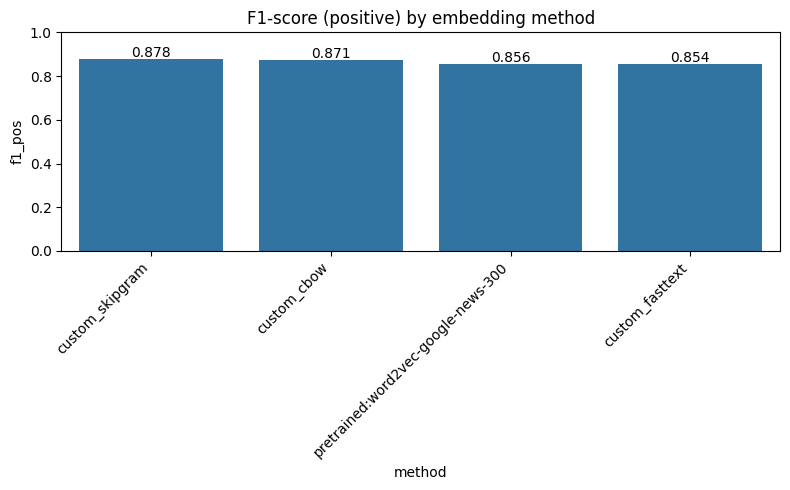

In [16]:
# Part 10: Plot F1 scores
plt.figure(figsize=(8,5))
sns.barplot(x='method', y='f1_pos', data=results_df)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)
plt.title("F1-score (positive) by embedding method")
for i,row in results_df.iterrows():
    plt.text(i, row.f1_pos + 0.01, f"{row.f1_pos:.3f}", ha='center')
plt.tight_layout()
plt.show()
